Group : Divya, Nupur, Ranadheer, Varun

In [254]:
import pandas as pd
import os, csv, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [255]:
Motor_Vehicle_DataSet = pd.read_csv("/content/sample_data/NYPD_Motor_Vehicle_Collisions_1000.csv")

In [256]:
Motor_Vehicle_DataSet.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/15/2016,0:30,MANHATTAN,10003.0,40.735270,-73.982346,"(40.73527, -73.982346)",NaN,NaN,300 EAST 19 STREET,...,Unspecified,NaN,NaN,NaN,3406829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,06/25/2013,13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2879485,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
2,09/15/2012,23:10,QUEENS,11418.0,40.695822,-73.821102,"(40.6958225, -73.8211022)",ATLANTIC AVENUE,127 STREET,NaN,...,Unspecified,NaN,NaN,NaN,204319,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,03/14/2018,10:00,NaN,NaN,40.699017,-73.806960,"(40.699017, -73.80696)",SUTPHIN BOULEVARD,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3862996,PASSENGER VEHICLE,BU,NaN,NaN,NaN
4,06/06/2018,19:45,BRONX,10454.0,40.807770,-73.910230,"(40.80777, -73.91023)",CONCORD AVENUE,EAST 142 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3915520,Carry All,Sedan,NaN,NaN,NaN


In [257]:
Motor_Vehicle_DataSet.shape

(1000, 29)

In [258]:
Motor_Vehicle_DataSet.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [259]:
Motor_Vehicle_DataSet.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
count,689.000000,881.000000,881.000000,999.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1.000000e+03
mean,10816.944848,40.678420,-73.836907,0.225225,0.001001,0.049000,0.001000,0.024000,0.0,0.153000,0.0,2.712078e+06
std,562.568895,1.374358,2.492012,0.539357,0.031639,0.220562,0.031623,0.153126,0.0,0.493796,0.0,1.465802e+06
min,10001.000000,0.000000,-74.211089,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.260000e+02
25%,10304.000000,40.667430,-73.977369,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.028678e+06
50%,11205.000000,40.725883,-73.925430,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.402009e+06
75%,11237.000000,40.768439,-73.870058,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.709420e+06
max,11693.000000,40.911037,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,0.0,4.000000,0.0,4.071031e+06


In [260]:
Motor_Vehicle_DataSet.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [261]:
#replacing blank values with NA
Motor_Vehicle_DataSet.replace(r'^\s*$', np.nan, regex=True)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/15/2016,0:30,MANHATTAN,10003.0,40.735270,-73.982346,"(40.73527, -73.982346)",NaN,NaN,300 EAST 19 STREET,...,Unspecified,NaN,NaN,NaN,3406829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,06/25/2013,13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2879485,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
2,09/15/2012,23:10,QUEENS,11418.0,40.695822,-73.821102,"(40.6958225, -73.8211022)",ATLANTIC AVENUE,127 STREET,NaN,...,Unspecified,NaN,NaN,NaN,204319,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,03/14/2018,10:00,NaN,NaN,40.699017,-73.806960,"(40.699017, -73.80696)",SUTPHIN BOULEVARD,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3862996,PASSENGER VEHICLE,BU,NaN,NaN,NaN
4,06/06/2018,19:45,BRONX,10454.0,40.807770,-73.910230,"(40.80777, -73.91023)",CONCORD AVENUE,EAST 142 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3915520,Carry All,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,07/21/2017,23:10,MANHATTAN,10036.0,40.758580,-73.983160,"(40.75858, -73.98316)",NaN,NaN,146 WEST 47 STREET,...,Unspecified,NaN,NaN,NaN,3717638,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN
996,11/13/2013,10:00,NaN,NaN,40.754553,-73.743165,"(40.7545534, -73.7431647)",NaN,NaN,NaN,...,Traffic Control Device Improper/Non-Working,Fatigued/Drowsy,Unspecified,NaN,3080365,VAN,UNKNOWN,SMALL COM VEH(4 TIRES),SMALL COM VEH(4 TIRES),NaN
997,03/17/2014,8:45,QUEENS,11361.0,40.758915,-73.765149,"(40.7589147, -73.7651492)",46 AVENUE,216 STREET,NaN,...,Unspecified,NaN,NaN,NaN,307227,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
998,12/17/2013,18:56,MANHATTAN,10032.0,40.843550,-73.936126,"(40.8435504, -73.9361256)",AUDUBON AVENUE,WEST 173 STREET,NaN,...,Unspecified,NaN,NaN,NaN,69763,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [262]:
Motor_Vehicle_DataSet['YEAR'] = Motor_Vehicle_DataSet['DATE'].str[-4:]
Motor_Vehicle_DataSet

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR
0,03/15/2016,0:30,MANHATTAN,10003.0,40.735270,-73.982346,"(40.73527, -73.982346)",NaN,NaN,300 EAST 19 STREET,...,NaN,NaN,NaN,3406829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016
1,06/25/2013,13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2879485,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN,2013
2,09/15/2012,23:10,QUEENS,11418.0,40.695822,-73.821102,"(40.6958225, -73.8211022)",ATLANTIC AVENUE,127 STREET,NaN,...,NaN,NaN,NaN,204319,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2012
3,03/14/2018,10:00,NaN,NaN,40.699017,-73.806960,"(40.699017, -73.80696)",SUTPHIN BOULEVARD,NaN,NaN,...,NaN,NaN,NaN,3862996,PASSENGER VEHICLE,BU,NaN,NaN,NaN,2018
4,06/06/2018,19:45,BRONX,10454.0,40.807770,-73.910230,"(40.80777, -73.91023)",CONCORD AVENUE,EAST 142 STREET,NaN,...,NaN,NaN,NaN,3915520,Carry All,Sedan,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,07/21/2017,23:10,MANHATTAN,10036.0,40.758580,-73.983160,"(40.75858, -73.98316)",NaN,NaN,146 WEST 47 STREET,...,NaN,NaN,NaN,3717638,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,2017
996,11/13/2013,10:00,NaN,NaN,40.754553,-73.743165,"(40.7545534, -73.7431647)",NaN,NaN,NaN,...,Fatigued/Drowsy,Unspecified,NaN,3080365,VAN,UNKNOWN,SMALL COM VEH(4 TIRES),SMALL COM VEH(4 TIRES),NaN,2013
997,03/17/2014,8:45,QUEENS,11361.0,40.758915,-73.765149,"(40.7589147, -73.7651492)",46 AVENUE,216 STREET,NaN,...,NaN,NaN,NaN,307227,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2014
998,12/17/2013,18:56,MANHATTAN,10032.0,40.843550,-73.936126,"(40.8435504, -73.9361256)",AUDUBON AVENUE,WEST 173 STREET,NaN,...,NaN,NaN,NaN,69763,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2013


**Plot 1 - Contribution of Years in which Collision happened in NY**

In 2017, 121 units of Collision happened in NY contributing 17.6%, followed by  the year 2016 with 115(16.7%) units. 

In [263]:
Motor_Vehicle_DataSet_sub = Motor_Vehicle_DataSet[['YEAR','BOROUGH']]
Motor_Vehicle_DataSet_sub['Accidents_Town_count'] = Motor_Vehicle_DataSet_sub.groupby('YEAR')['BOROUGH'].transform(lambda x: x.count())
Motor_Vehicle_DataSet_sub

<ipython-input-263-65aebb52427c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YEAR,BOROUGH,Accidents_Town_count
0,2016,MANHATTAN,115
1,2013,NaN,102
2,2012,QUEENS,49
3,2018,NaN,94
4,2018,BRONX,94
...,...,...,...
995,2017,MANHATTAN,121
996,2013,NaN,102
997,2014,QUEENS,94
998,2013,MANHATTAN,102


In [264]:
Motor_Vehicle_DataSet_pie = Motor_Vehicle_DataSet_sub.drop('BOROUGH',axis=1).drop_duplicates().sort_values(by='Accidents_Town_count',ascending=False)
Motor_Vehicle_DataSet_pie

,YEAR,Accidents_Town_count
5,2017,121
0,2016,115
8,2015,108
1,2013,102
3,2018,94
7,2014,94
2,2012,49
84,2019,6


In [265]:
fig = px.pie(values = Motor_Vehicle_DataSet_pie.Accidents_Town_count,
             names = Motor_Vehicle_DataSet_pie.YEAR,
             title = "Contribution of Years in which Collision happened in NY")

fig.show()

**Plot 2 - Yearly analysis of number of injured  people by category**

Though the number of Collision happend in 2017 is more than 2016, but the number of people injured in 2016 is more than 2017. 

In [266]:
Motor_Vehicle_DataSet_series = Motor_Vehicle_DataSet[['YEAR','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']]
Motor_Vehicle_DataSet_series['Person_Injured_Sum'] = Motor_Vehicle_DataSet_series.groupby('YEAR')['NUMBER OF PERSONS INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_series['Pedestrians_Injured_Sum'] = Motor_Vehicle_DataSet_series.groupby('YEAR')['NUMBER OF PEDESTRIANS INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_series['Cyclist_Injured_Sum'] = Motor_Vehicle_DataSet_series.groupby('YEAR')['NUMBER OF CYCLIST INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_series['Motorist_Injured_Sum'] = Motor_Vehicle_DataSet_series.groupby('YEAR')['NUMBER OF MOTORIST INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_series = Motor_Vehicle_DataSet_series.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED' ],axis=1).drop_duplicates().sort_values(by='YEAR').head(20)
Motor_Vehicle_DataSet_series

<ipython-input-266-cb07c2120a4e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-266-cb07c2120a4e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-266-cb07c2120a4e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-266-cb0

,YEAR,Person_Injured_Sum,Pedestrians_Injured_Sum,Cyclist_Injured_Sum,Motorist_Injured_Sum
2,2012,11.0,0,2,9
1,2013,23.0,6,2,15
7,2014,32.0,3,5,24
8,2015,45.0,15,2,28
0,2016,48.0,11,4,33
5,2017,42.0,9,6,28
3,2018,21.0,5,3,13
84,2019,3.0,0,0,3


In [267]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=Motor_Vehicle_DataSet_series['YEAR'],
    y=Motor_Vehicle_DataSet_series['Person_Injured_Sum'],
    name="Persons",
    mode='lines+markers+text',
    textposition='top center',
    line_shape='spline'))

fig.add_trace(go.Scatter(
    x=Motor_Vehicle_DataSet_series['YEAR'],
    y=Motor_Vehicle_DataSet_series['Pedestrians_Injured_Sum'],
    name="Pedestrians",
    mode='lines+markers+text',
    textposition='top center',
    line_shape='spline'))

fig.add_trace(go.Scatter(
    x=Motor_Vehicle_DataSet_series['YEAR'],
    y=Motor_Vehicle_DataSet_series['Cyclist_Injured_Sum'],
    name="Cyclist",
    mode='lines+markers+text',
    textposition='top center',
    line_shape='spline'))

fig.add_trace(go.Scatter(
    x=Motor_Vehicle_DataSet_series['YEAR'],
    y=Motor_Vehicle_DataSet_series['Motorist_Injured_Sum'],
    name="Motorist",
    mode='lines+markers+text',
    textposition='top center',
    line_shape='spline'))

fig.update_layout(title_text='Yearly analysis of number of injured  people by category') 

fig.show()

**Plot 3 - Daily level breakdown of Number of People injured for the year 2016** 

Passenger injuries are seasonal and tend to increase during the summer months like June & July and due to updation in Vision Zero law in 2016 the injuries got reduced in future years. 

In [268]:
Motor_Vehicle_DataSet_2016 = Motor_Vehicle_DataSet[(Motor_Vehicle_DataSet['YEAR']=='2016') & (Motor_Vehicle_DataSet['NUMBER OF PERSONS INJURED'] > 0)]

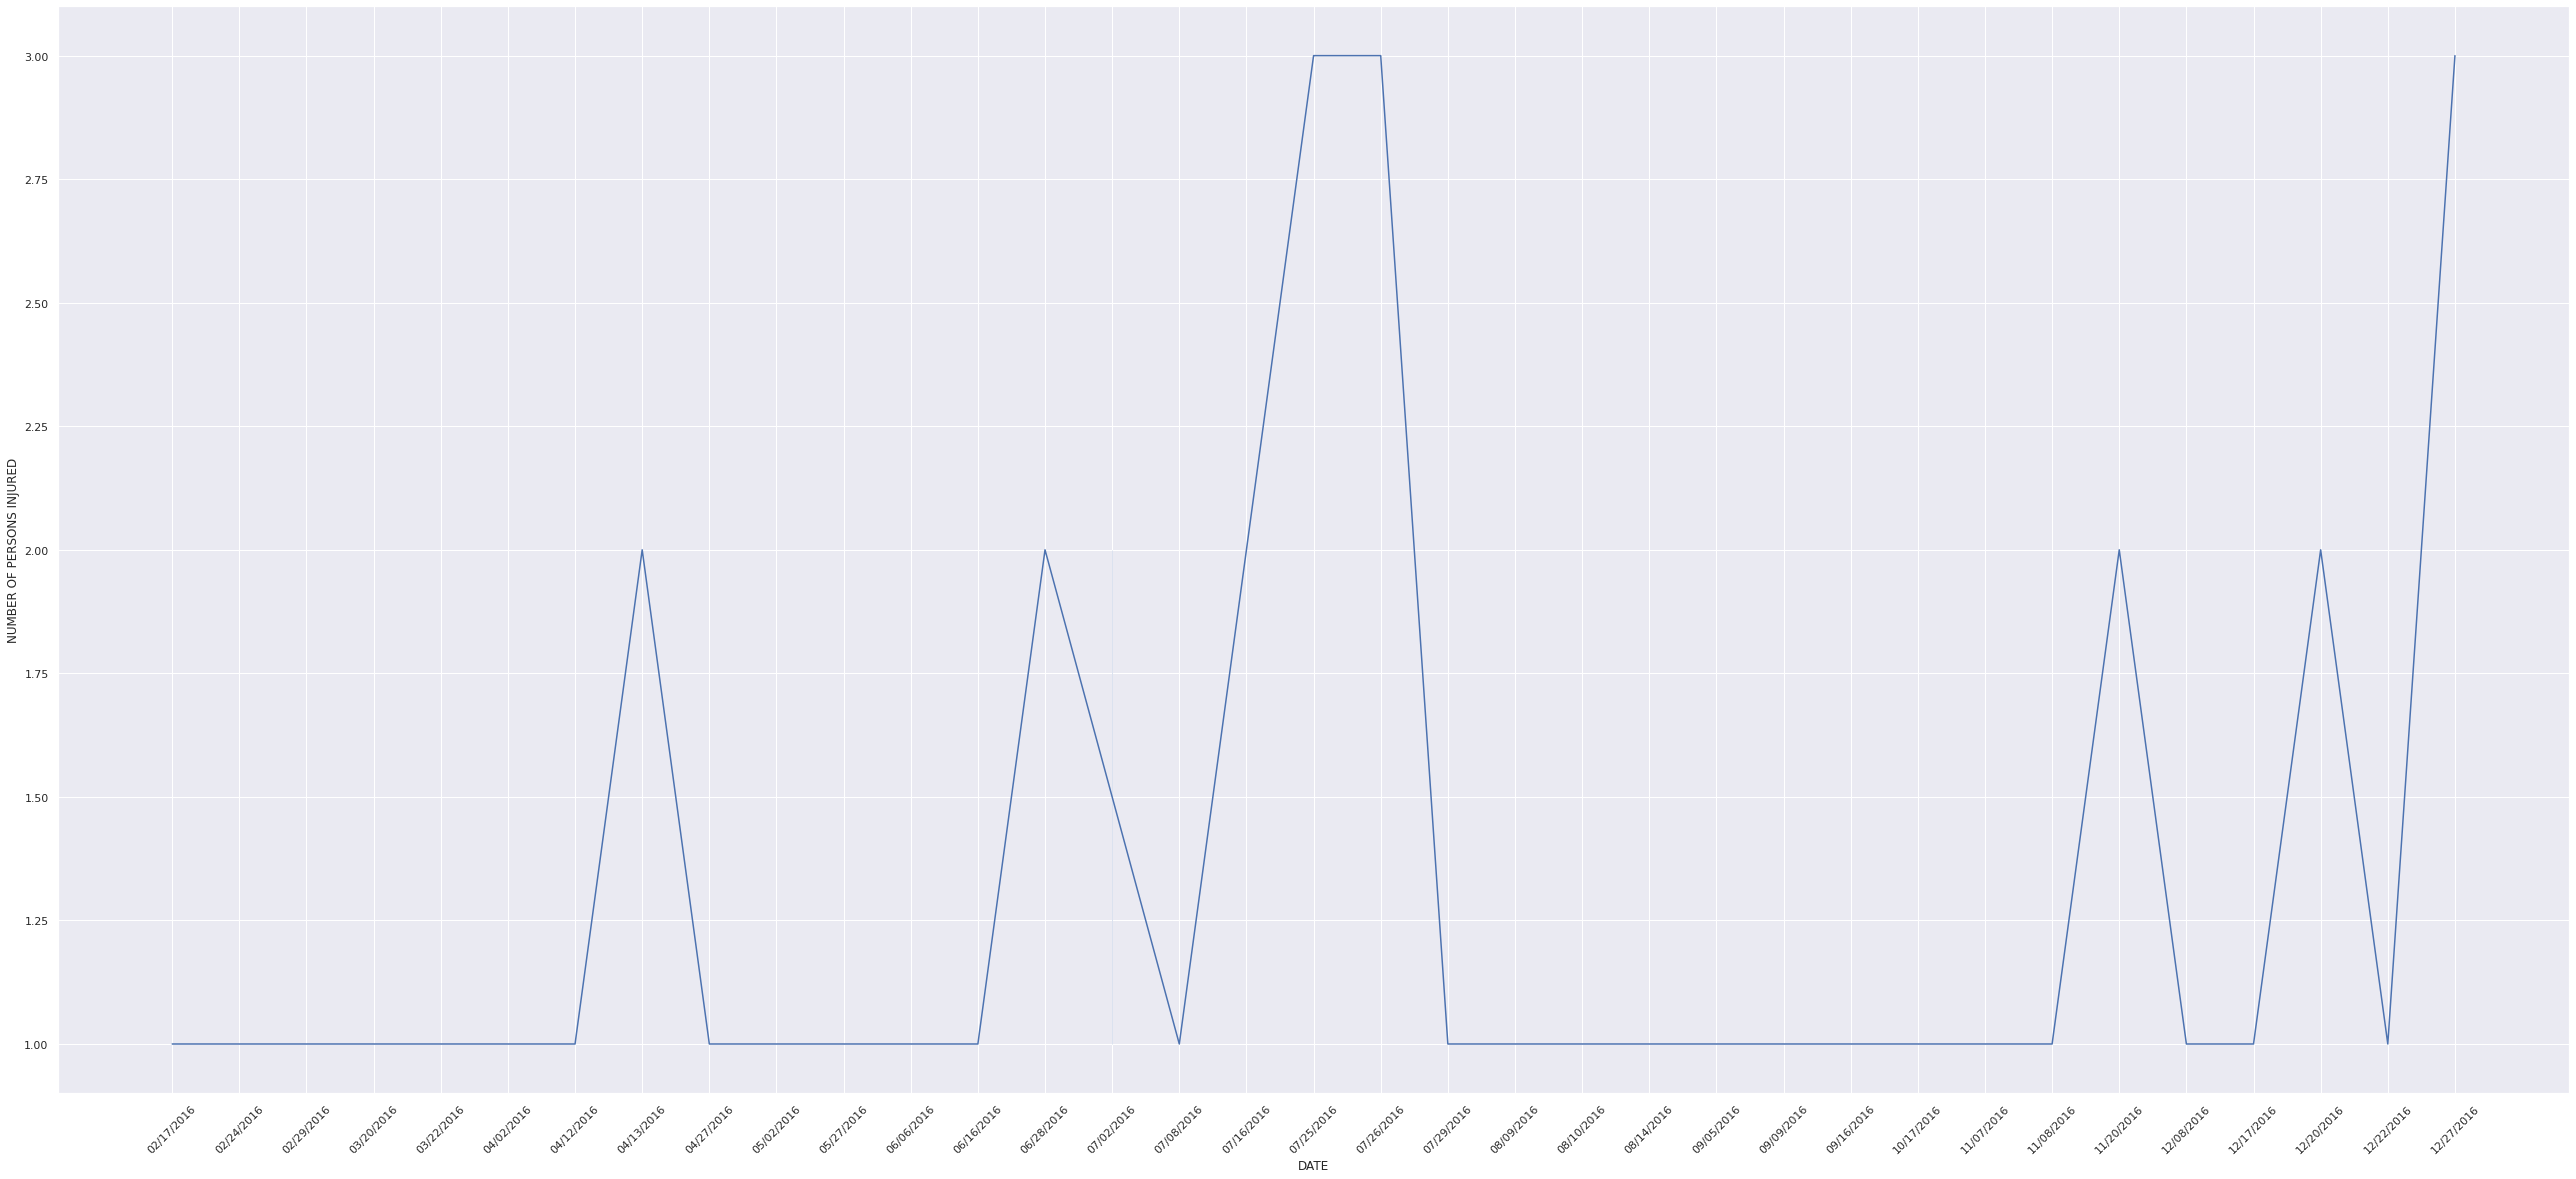

In [269]:
Motor_Vehicle_DataSet_2016 = Motor_Vehicle_DataSet_2016.sort_values(by='DATE',ascending=True)
plt.figure(figsize=(45,20))
sns.set_theme(style='darkgrid')
sns.lineplot(x='DATE',y='NUMBER OF PERSONS INJURED',data=Motor_Vehicle_DataSet_2016);
plt.xticks(rotation=45);

**Plot 4 - Year wise count of town with the # of Person injured**

In [270]:
Motor_Vehicle_DataSet_rename = Motor_Vehicle_DataSet.rename(columns={'ON STREET NAME':'ON_STREET_NAME', 'CROSS STREET NAME':'CROSS_STREET_NAME', 'NUMBER OF PERSONS INJURED':'NUMBER_OF_PERSONS_INJURED','NUMBER OF PEDESTRIANS INJURED':'NUMBER_OF_PEDESTRIANS_INJURED','NUMBER OF CYCLIST INJURED':'NUMBER_OF_CYCLIST_INJURED', 'NUMBER OF MOTORIST INJURED':'NUMBER_OF_MOTORIST_INJURED','CONTRIBUTING FACTOR VEHICLE 1': 'CONTRIBUTING_FACTOR_VEHICLE_1','VEHICLE TYPE CODE 1':'VEHICLE_TYPE_CODE_1'})

In [271]:
Motor_Vehicle_DataSet_rename.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF STREET NAME',
       'NUMBER_OF_PERSONS_INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER_OF_PEDESTRIANS_INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER_OF_CYCLIST_INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER_OF_MOTORIST_INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE_TYPE_CODE_1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'YEAR'],
      dtype='object')

In [272]:
fig = px.density_heatmap(x = Motor_Vehicle_DataSet_rename.NUMBER_OF_PERSONS_INJURED, 
                         y = Motor_Vehicle_DataSet_rename.YEAR, 
                         z = Motor_Vehicle_DataSet_rename.BOROUGH, histfunc = 'count', 
                         nbinsx=5,
                         text_auto = True)

fig.update_layout(
    title="Year wise count of town with the # of Person injured",
    xaxis_title="NUMBER OF PERSONS INJURED",
    yaxis_title="YEAR",
    title_font_color="blue")

fig.show()

**Plot 5 - People experienced Collision and got injured or killed**

Under three categories, Motorist got injured most in NY and only a pedestrian got killed other than them no one was killed in accident. 

In [273]:
Motor_Vehicle_DataSet_Accidents = Motor_Vehicle_DataSet[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']]
Motor_Vehicle_DataSet_Accidents

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,0.0,0.0,0,0,0,0,0,0
1,0.0,0.0,0,0,0,0,0,0
2,0.0,0.0,0,0,0,0,0,0
3,1.0,0.0,0,0,0,0,1,0
4,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,0,0,0,0,0,0
996,0.0,0.0,0,0,0,0,0,0
997,0.0,0.0,0,0,0,0,0,0
998,0.0,0.0,0,0,0,0,0,0


In [274]:
Motor_Vehicle_DataSet_Accidents.loc['Total']= Motor_Vehicle_DataSet_Accidents.sum()
Motor_Vehicle_DataSet_Accidents

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
Motor_Vehicle_DataSet_Accidents.drop(Motor_Vehicle_DataSet_Accidents.index[0:1000], inplace=True)
Motor_Vehicle_DataSet_Accidents

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
Total,225.0,1.0,49.0,1.0,24.0,0.0,153.0,0.0


In [276]:
Motor_Vehicle_DataSet_Accidents = pd.melt(Motor_Vehicle_DataSet_Accidents, var_name="Medium_of_Accidents")
Motor_Vehicle_DataSet_Accidents

,Medium_of_Accidents,value
0,NUMBER OF PERSONS INJURED,225.0
1,NUMBER OF PERSONS KILLED,1.0
2,NUMBER OF PEDESTRIANS INJURED,49.0
3,NUMBER OF PEDESTRIANS KILLED,1.0
4,NUMBER OF CYCLIST INJURED,24.0
5,NUMBER OF CYCLIST KILLED,0.0
6,NUMBER OF MOTORIST INJURED,153.0
7,NUMBER OF MOTORIST KILLED,0.0


Text(0.5, 1.0, 'People experienced Collision and got injured or killed')

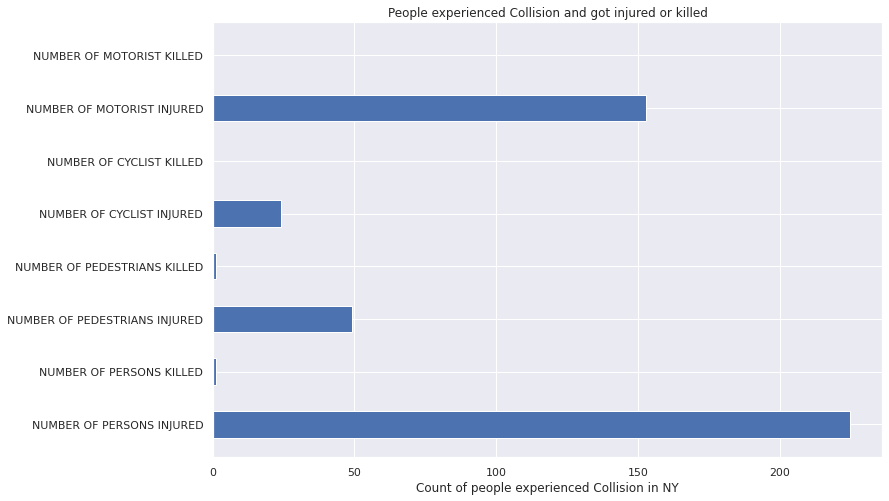

In [277]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '15'
plt.barh(y=Motor_Vehicle_DataSet_Accidents['Medium_of_Accidents'],width=Motor_Vehicle_DataSet_Accidents['value'], height=0.5 , align='center');
plt.xlabel('Count of people experienced Collision in NY');
plt.title("People experienced Collision and got injured or killed")

**Plot 6 - Reason by which the Motorist got injured**

Due to 'Driver Distraction' and 'Failure to Yield Right-of-Way' most of the Motorist got injured. 

In [278]:
Motor_Vehicle_DataSet_Reason = Motor_Vehicle_DataSet_rename[['NUMBER_OF_MOTORIST_INJURED','CONTRIBUTING_FACTOR_VEHICLE_1']]
Motor_Vehicle_DataSet_Reason = Motor_Vehicle_DataSet_Reason[(Motor_Vehicle_DataSet_Reason['NUMBER_OF_MOTORIST_INJURED'] > 0)]

In [279]:
Motor_Vehicle_DataSet_Reason['Motorist_Injured'] = Motor_Vehicle_DataSet_Reason.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_MOTORIST_INJURED'].transform(lambda x: x.count())
Motor_Vehicle_DataSet_Reason

,NUMBER_OF_MOTORIST_INJURED,CONTRIBUTING_FACTOR_VEHICLE_1,Motorist_Injured
3,1,Driver Inattention/Distraction,22
10,1,Unspecified,37
13,2,Following Too Closely,6
23,1,Traffic Control Disregarded,5
28,2,Unspecified,37
...,...,...,...
931,1,Unspecified,37
949,1,Driver Inattention/Distraction,22
959,1,Unspecified,37
969,1,Brakes Defective,2


In [280]:
Motor_Vehicle_DataSet_plot = Motor_Vehicle_DataSet_Reason.drop('NUMBER_OF_MOTORIST_INJURED',axis=1).drop_duplicates().head(20)
Motor_Vehicle_DataSet_plot

,CONTRIBUTING_FACTOR_VEHICLE_1,Motorist_Injured
3,Driver Inattention/Distraction,22
10,Unspecified,37
13,Following Too Closely,6
23,Traffic Control Disregarded,5
43,Other Vehicular,4
70,Oversized Vehicle,1
75,Failure to Yield Right-of-Way,7
80,Alcohol Involvement,2
94,Lost Consciousness,1
149,Unsafe Lane Changing,1


In [281]:
Motor_Vehicle_DataSet_plot = Motor_Vehicle_DataSet_plot.drop(labels=10, axis=0)
Motor_Vehicle_DataSet_plot

,CONTRIBUTING_FACTOR_VEHICLE_1,Motorist_Injured
3,Driver Inattention/Distraction,22
13,Following Too Closely,6
23,Traffic Control Disregarded,5
43,Other Vehicular,4
70,Oversized Vehicle,1
75,Failure to Yield Right-of-Way,7
80,Alcohol Involvement,2
94,Lost Consciousness,1
149,Unsafe Lane Changing,1
169,Passing or Lane Usage Improper,1


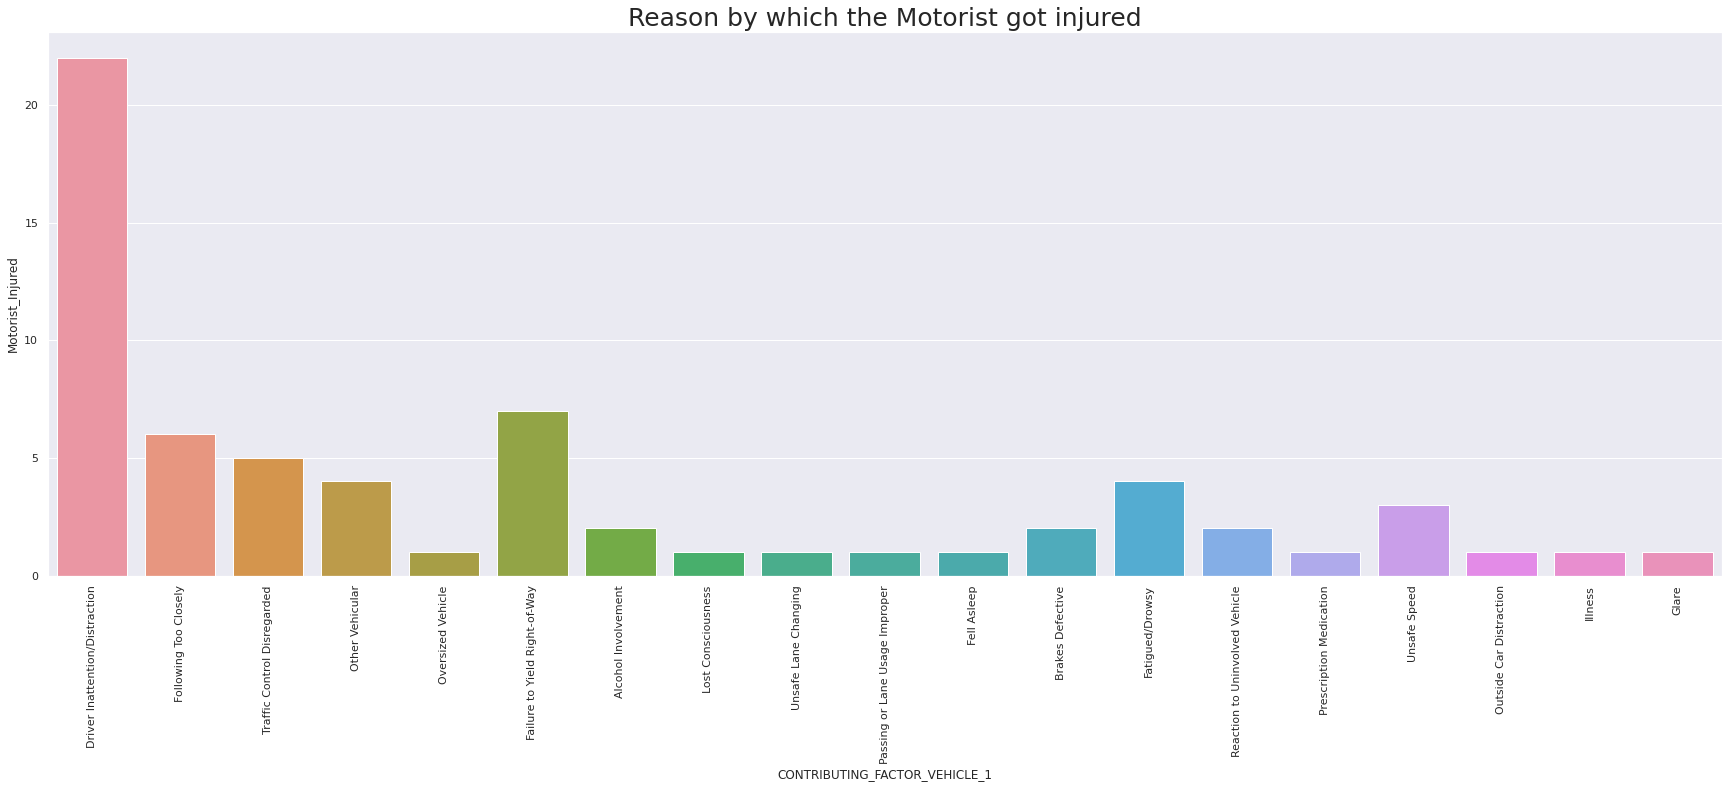

In [282]:
plt.figure(figsize=(30,10))
sns.barplot(x=Motor_Vehicle_DataSet_plot.CONTRIBUTING_FACTOR_VEHICLE_1,y=Motor_Vehicle_DataSet_plot.Motorist_Injured);
plt.title("Reason by which the Motorist got injured", fontsize=25)
plt.xticks(rotation=90);

**Plot 7 - Town by count of streets got affected from Collision**

According to the Stats **BROOKLYN** was having highest count of the street affected by the collision. 

In [283]:
Motor_Vehicle_DataSet_subset = Motor_Vehicle_DataSet_rename[['BOROUGH','ON_STREET_NAME']]
Motor_Vehicle_DataSet_subset['Accidents_Street_count'] = Motor_Vehicle_DataSet_subset.groupby('BOROUGH')['ON_STREET_NAME'].transform(lambda x: x.count())
Motor_Vehicle_DataSet_subset

<ipython-input-283-8f884944990a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,BOROUGH,ON_STREET_NAME,Accidents_Street_count
0,MANHATTAN,NaN,141.0
1,NaN,NaN,NaN
2,QUEENS,ATLANTIC AVENUE,159.0
3,NaN,SUTPHIN BOULEVARD,NaN
4,BRONX,CONCORD AVENUE,78.0
...,...,...,...
995,MANHATTAN,NaN,141.0
996,NaN,NaN,NaN
997,QUEENS,46 AVENUE,159.0
998,MANHATTAN,AUDUBON AVENUE,141.0


In [284]:
Motor_Vehicle_DataSet_view = Motor_Vehicle_DataSet_subset.drop(['ON_STREET_NAME'],axis=1).drop_duplicates().sort_values(by='Accidents_Street_count').head(20)
Motor_Vehicle_DataSet_view

,BOROUGH,Accidents_Street_count
94,STATEN ISLAND,35.0
4,BRONX,78.0
0,MANHATTAN,141.0
2,QUEENS,159.0
9,BROOKLYN,168.0
1,NaN,NaN


In [285]:
Motor_Vehicle_DataSet_view = Motor_Vehicle_DataSet_view.dropna()

In [286]:
px.bar(data_frame=Motor_Vehicle_DataSet_view, x='BOROUGH', y='Accidents_Street_count', color='Accidents_Street_count', title='Town by count of streets got affected from Accidents')

**Plot 8 - Top 5 Streets of Brooklyn with Traffic collision**

**Atlantic Avenue** and **Flatbush Avenue** are most popular streets of Brooklyn and famous for shopping and food they are also considered to be busy commercial streets. 

In [287]:
Motor_Vehicle_DataSet_BROOKLYN = Motor_Vehicle_DataSet_subset[(Motor_Vehicle_DataSet_subset['BOROUGH']=="BROOKLYN")]
Motor_Vehicle_DataSet_BROOKLYN = Motor_Vehicle_DataSet_BROOKLYN.drop(['BOROUGH','Accidents_Street_count'],axis=1)
Motor_Vehicle_DataSet_BROOKLYN = Motor_Vehicle_DataSet_BROOKLYN.groupby('ON_STREET_NAME').count()
Motor_Vehicle_DataSet_BROOKLYN

""
ON_STREET_NAME
11 AVENUE
14 AVENUE
2 AVENUE
2 STREET
20 AVENUE
...
WEST 9 STREET
WHITWELL PLACE
WILLIAMSBURG STREET WEST


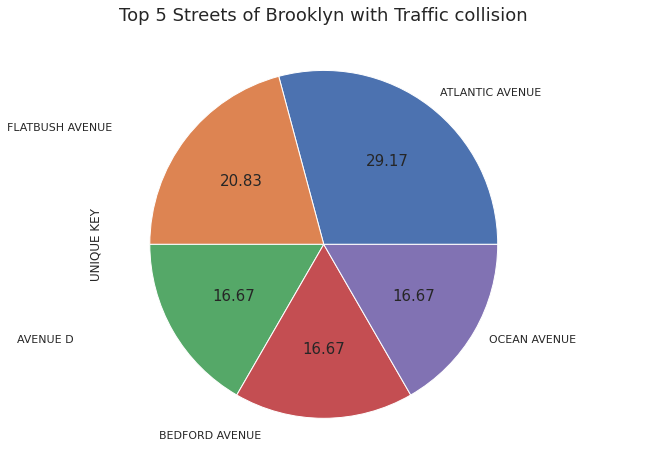

In [288]:
Motor_Vehicle_DataSet_BROOKLYN = Motor_Vehicle_DataSet[(Motor_Vehicle_DataSet['BOROUGH']=="BROOKLYN")]
TOP5 = Motor_Vehicle_DataSet_BROOKLYN.groupby('ON STREET NAME').count().sort_values(by='UNIQUE KEY', ascending=False).head(5)['UNIQUE KEY']
fig, ax = plt.subplots(figsize=(8, 8))
fontsize = 18
plt.title("Top 5 Streets of Brooklyn with Traffic collision", fontdict={'fontsize': fontsize})
TOP5.plot(kind = 'pie',autopct = '%.2f')

**Plot 9 - Most frequent Vehicle Type responsible for traffic collisions in NY**

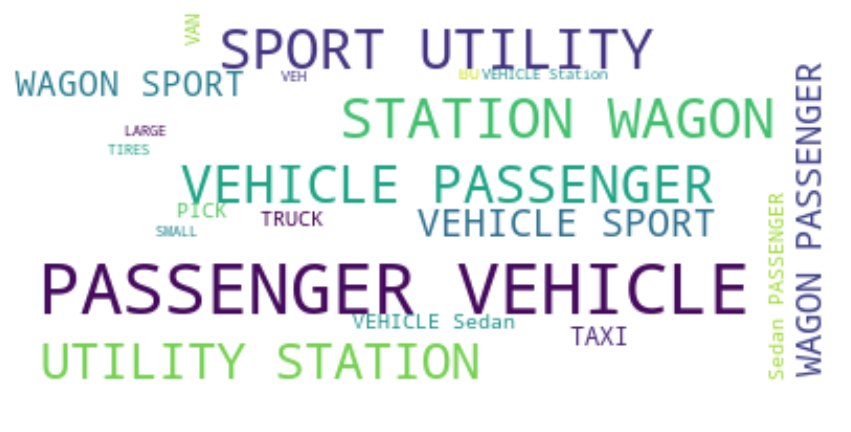

In [289]:
from wordcloud import WordCloud
VEHICLE_TYPE_CODE_1_text = " ".join(str(i) for i in Motor_Vehicle_DataSet_rename.VEHICLE_TYPE_CODE_1)
wordcloud = WordCloud(background_color="white",max_words=20).generate(VEHICLE_TYPE_CODE_1_text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=10, y=10)
plt.show()

**Plot 10 - Visualizing Count shift of Collision in town travelling with Passenger vehicle or not**

In [290]:
Motor_Vehicle_DataSet_with_Passenger_vehicle = Motor_Vehicle_DataSet_rename[(Motor_Vehicle_DataSet_rename['VEHICLE_TYPE_CODE_1'] == "PASSENGER VEHICLE")]
Motor_Vehicle_DataSet_without_Passenger_vehicle = Motor_Vehicle_DataSet_rename[(Motor_Vehicle_DataSet_rename['VEHICLE_TYPE_CODE_1'] != "PASSENGER VEHICLE")]

In [291]:
Motor_Vehicle_DataSet_with_Passenger_vehicle = Motor_Vehicle_DataSet_with_Passenger_vehicle[['YEAR','BOROUGH']]
Motor_Vehicle_DataSet_with_Passenger_vehicle['Accidents_Town_count'] = Motor_Vehicle_DataSet_with_Passenger_vehicle.groupby('YEAR')['BOROUGH'].transform(lambda x: x.count())
Motor_Vehicle_DataSet_with_Passenger_vehicle = Motor_Vehicle_DataSet_with_Passenger_vehicle.drop('BOROUGH',axis=1).drop_duplicates().sort_values(by='Accidents_Town_count',ascending=False).head(20)
Motor_Vehicle_DataSet_with_Passenger_vehicle

,YEAR,Accidents_Town_count
0,2016,83
5,2017,58
1,2013,53
65,2015,51
15,2014,46
2,2012,25
3,2018,14


In [292]:
Motor_Vehicle_DataSet_without_Passenger_vehicle = Motor_Vehicle_DataSet_without_Passenger_vehicle[['YEAR','BOROUGH']]
Motor_Vehicle_DataSet_without_Passenger_vehicle['Accidents_Town_count'] = Motor_Vehicle_DataSet_without_Passenger_vehicle.groupby('YEAR')['BOROUGH'].transform(lambda x: x.count())
Motor_Vehicle_DataSet_without_Passenger_vehicle = Motor_Vehicle_DataSet_without_Passenger_vehicle.drop('BOROUGH',axis=1).drop_duplicates().sort_values(by='Accidents_Town_count',ascending=False).head(20)
Motor_Vehicle_DataSet_without_Passenger_vehicle

<ipython-input-292-3eac468cbbd2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YEAR,Accidents_Town_count
4,2018,80
9,2017,63
8,2015,57
35,2013,49
7,2014,48
19,2016,32
31,2012,24
84,2019,6


In [293]:
Motor_Vehicle_DataSet_with_Passenger_vehicle['Accidents_Town_count_diff'] = Motor_Vehicle_DataSet_with_Passenger_vehicle['Accidents_Town_count'] - Motor_Vehicle_DataSet_with_Passenger_vehicle['Accidents_Town_count'].shift(periods=1) 
Motor_Vehicle_DataSet_without_Passenger_vehicle['Accidents_Town_count_diff'] = Motor_Vehicle_DataSet_without_Passenger_vehicle['Accidents_Town_count'] - Motor_Vehicle_DataSet_without_Passenger_vehicle['Accidents_Town_count'].shift(periods=1) 

Text(0.5, 1.0, 'Visualizing Count shift of Collision in town travelling with Passenger vehicle or not')

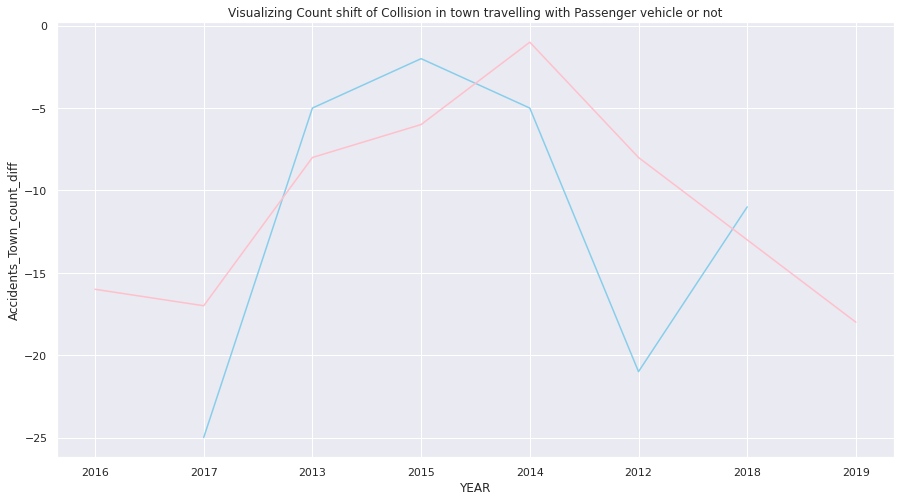

In [294]:
plt.figure(figsize=(15,8))
sns.set_theme(style='darkgrid')
sns.lineplot(x='YEAR',y='Accidents_Town_count_diff',data=Motor_Vehicle_DataSet_with_Passenger_vehicle,color='skyblue');
sns.lineplot(x='YEAR',y='Accidents_Town_count_diff',data=Motor_Vehicle_DataSet_without_Passenger_vehicle,color='pink');
plt.title("Visualizing Count shift of Collision in town travelling with Passenger vehicle or not")

**Plot 11 - Time at which most Collision happend in NY**

In evening, 16:00 pm most of the accidents happend in NY because these are the times when people are commuting to and from work. Out of total accidents, 27 units are from **QNEENS** region only. 

Car accidents and pedestrian fatalities happen all over the Queens, but “The Boulevard of Death” has a particularly infamous reputation for them. With up to ten lanes of traffic in some portions, **Queens Boulevard** is structurally hazardous for all road users with 42.86% of top 5 streets of Queens.

In [295]:
Motor_Vehicle_DataSet['HOURS'] = Motor_Vehicle_DataSet['TIME'].str[:-3]
Motor_Vehicle_DataSet

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR,HOURS
0,03/15/2016,0:30,MANHATTAN,10003.0,40.735270,-73.982346,"(40.73527, -73.982346)",NaN,NaN,300 EAST 19 STREET,...,NaN,NaN,3406829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016,0
1,06/25/2013,13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2879485,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN,2013,13
2,09/15/2012,23:10,QUEENS,11418.0,40.695822,-73.821102,"(40.6958225, -73.8211022)",ATLANTIC AVENUE,127 STREET,NaN,...,NaN,NaN,204319,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2012,23
3,03/14/2018,10:00,NaN,NaN,40.699017,-73.806960,"(40.699017, -73.80696)",SUTPHIN BOULEVARD,NaN,NaN,...,NaN,NaN,3862996,PASSENGER VEHICLE,BU,NaN,NaN,NaN,2018,10
4,06/06/2018,19:45,BRONX,10454.0,40.807770,-73.910230,"(40.80777, -73.91023)",CONCORD AVENUE,EAST 142 STREET,NaN,...,NaN,NaN,3915520,Carry All,Sedan,NaN,NaN,NaN,2018,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,07/21/2017,23:10,MANHATTAN,10036.0,40.758580,-73.983160,"(40.75858, -73.98316)",NaN,NaN,146 WEST 47 STREET,...,NaN,NaN,3717638,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,2017,23
996,11/13/2013,10:00,NaN,NaN,40.754553,-73.743165,"(40.7545534, -73.7431647)",NaN,NaN,NaN,...,Unspecified,NaN,3080365,VAN,UNKNOWN,SMALL COM VEH(4 TIRES),SMALL COM VEH(4 TIRES),NaN,2013,10
997,03/17/2014,8:45,QUEENS,11361.0,40.758915,-73.765149,"(40.7589147, -73.7651492)",46 AVENUE,216 STREET,NaN,...,NaN,NaN,307227,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2014,8
998,12/17/2013,18:56,MANHATTAN,10032.0,40.843550,-73.936126,"(40.8435504, -73.9361256)",AUDUBON AVENUE,WEST 173 STREET,NaN,...,NaN,NaN,69763,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2013,18


In [296]:
Motor_Vehicle_DataSet_TIME = Motor_Vehicle_DataSet[['BOROUGH','HOURS']]
Motor_Vehicle_DataSet_TIME = Motor_Vehicle_DataSet_TIME[Motor_Vehicle_DataSet_TIME['BOROUGH'].notna()]
Motor_Vehicle_DataSet_TIME = Motor_Vehicle_DataSet_TIME[Motor_Vehicle_DataSet_TIME['HOURS'].notna()]
Motor_Vehicle_DataSet_TIME = Motor_Vehicle_DataSet_TIME.sort_values(by='HOURS')
Motor_Vehicle_DataSet_TIME

,BOROUGH,HOURS
0,MANHATTAN,0
691,MANHATTAN,0
685,QUEENS,0
107,MANHATTAN,0
502,QUEENS,0
...,...,...
913,BROOKLYN,9
381,BRONX,9
534,MANHATTAN,9
309,MANHATTAN,9


In [297]:
fig = px.histogram(data_frame=Motor_Vehicle_DataSet_TIME, x="HOURS", color='BOROUGH', marginal="box", title="Time at which most Collision happend in NY")
fig.show()

In [298]:
Motor_Vehicle_DataSet_QUEENS = Motor_Vehicle_DataSet[(Motor_Vehicle_DataSet['BOROUGH']=="QUEENS") & (Motor_Vehicle_DataSet['HOURS'] == "16")]

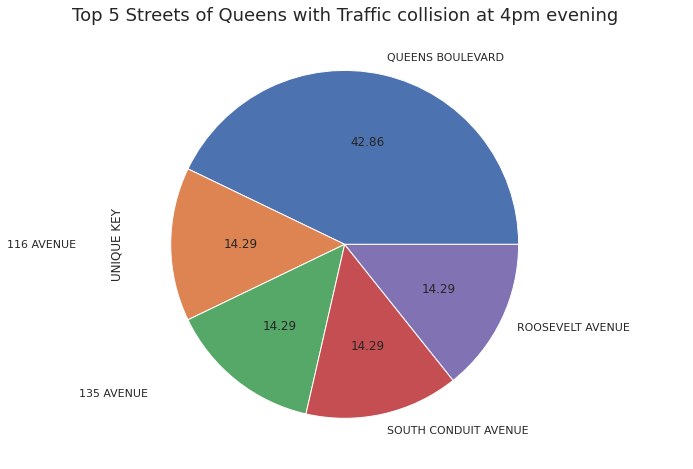

In [299]:
Top_5_Queen_Streets = Motor_Vehicle_DataSet_QUEENS.groupby('ON STREET NAME').count().sort_values(by='UNIQUE KEY', ascending=False).head(5)['UNIQUE KEY']
fig, ax = plt.subplots(figsize=(8, 8))
fontsize = 18
plt.title("Top 5 Streets of Queens with Traffic collision at 4pm evening", fontdict={'fontsize': fontsize})
Top_5_Queen_Streets.plot(kind = 'pie', autopct = '%.2f')

**Plot 12 - Collision per week per hour**

Morning Weekdays seems to be rush hours for collisions along with Friday where weekend trips are planned mostly. 

In [300]:
Motor_Vehicle_DataSet['DATE'] = pd.to_datetime(Motor_Vehicle_DataSet['DATE'])
Motor_Vehicle_DataSet.loc[:, 'WEEKDAY'] = Motor_Vehicle_DataSet['DATE'].dt.weekday

In [301]:
W_0 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['WEEKDAY'] == 0].groupby('HOURS').count()
W_1 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['WEEKDAY'] == 1].groupby('HOURS').count()
W_2 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['WEEKDAY'] == 2].groupby('HOURS').count()
W_3 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['WEEKDAY'] == 3].groupby('HOURS').count()
W_4 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['WEEKDAY'] == 4].groupby('HOURS').count()
W_5 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['WEEKDAY'] == 5].groupby('HOURS').count()
W_6 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['WEEKDAY'] == 6].groupby('HOURS').count()

fig = go.Figure(data=go.Heatmap(
                   z=[W_0.TIME,W_1.TIME,W_2.TIME,W_3.TIME,W_4.TIME,W_5.TIME,W_6.TIME],
                   y=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                   x=['Midnight','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','Noon','1pm','2pm',
                     '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],
                   hoverongaps = False))

fig.update_layout(title_text='Collision per week per hour') 
fig.show()

**Plot - 13 Yearly analysis of collision in which more than 2 people got injured**

Only Motorist got injured where the count is greater than 2 from number of person injured in traffic collision of NY.

In [302]:
Motor_Vehicle_DataSet_Injured_morethan_2 = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['NUMBER OF PERSONS INJURED'] > 2]

In [303]:
Motor_Vehicle_DataSet_Injured_morethan_2 = Motor_Vehicle_DataSet_Injured_morethan_2[['YEAR','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']]
Motor_Vehicle_DataSet_Injured_morethan_2['Person_Injured_Sum'] = Motor_Vehicle_DataSet_Injured_morethan_2.groupby('YEAR')['NUMBER OF PERSONS INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_Injured_morethan_2['Pedestrians_Injured_Sum'] = Motor_Vehicle_DataSet_Injured_morethan_2.groupby('YEAR')['NUMBER OF PEDESTRIANS INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_Injured_morethan_2['Cyclist_Injured_Sum'] = Motor_Vehicle_DataSet_Injured_morethan_2.groupby('YEAR')['NUMBER OF CYCLIST INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_Injured_morethan_2['Motorist_Injured_Sum'] = Motor_Vehicle_DataSet_Injured_morethan_2.groupby('YEAR')['NUMBER OF MOTORIST INJURED'].transform(lambda x: x.sum())
Motor_Vehicle_DataSet_Injured_morethan_2 = Motor_Vehicle_DataSet_Injured_morethan_2.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED' ],axis=1).drop_duplicates().sort_values(by='YEAR').head(20)
Motor_Vehicle_DataSet_Injured_morethan_2

,YEAR,Person_Injured_Sum,Pedestrians_Injured_Sum,Cyclist_Injured_Sum,Motorist_Injured_Sum
673,2013,3.0,0,0,3
461,2014,3.0,0,0,3
780,2015,7.0,0,0,7
313,2016,9.0,0,0,9
125,2017,9.0,0,0,9


In [304]:
Motor_Vehicle_DataSet_Injured_morethan_2 = Motor_Vehicle_DataSet_Injured_morethan_2.set_index("YEAR")
categories = Motor_Vehicle_DataSet_Injured_morethan_2.columns
fig = go.Figure()

for g in Motor_Vehicle_DataSet_Injured_morethan_2.index:
    fig.add_trace(go.Scatterpolar(
        r = Motor_Vehicle_DataSet_Injured_morethan_2.loc[g].values,
        theta = categories,
        fill = 'toself',
        name = f'cluster #{g}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10] # here we can define the range
    )),
  showlegend=True,
    title="Issues with Plotly",
    title_x=0.5
)

fig.update_layout(title_text='Yearly analysis of collision in which more than 2 people got injured') 

fig.show()


**Plot 14 - Number of Injuries in Traffic Collision in NY locating through Latitude and Longitude of the Location.**

In [305]:
scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
    lat = Motor_Vehicle_DataSet['LATITUDE'],
    lon = Motor_Vehicle_DataSet['LONGITUDE'],
    text = Motor_Vehicle_DataSet['NUMBER OF PERSONS INJURED'].astype(str) + ' units',
    marker = dict(
        color = Motor_Vehicle_DataSet['NUMBER OF PERSONS INJURED'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 1
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Number of Injuries in Traffic Collision in NY',
)
fig.show()

**Plot 15 - Trend and Seasonal analysis for the Motor Vehicle Collisions between 2012 to 2019 in NY**

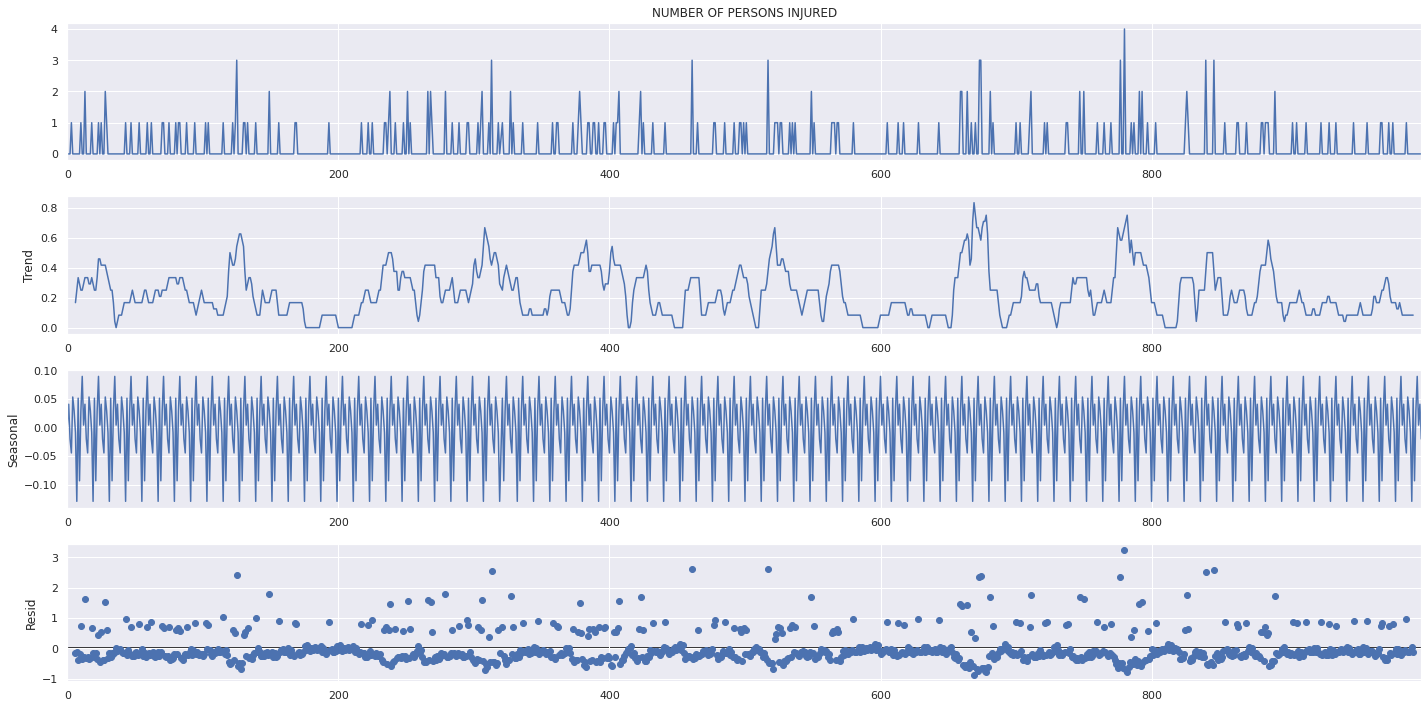

In [306]:
Motor_Vehicle_DataSet_notna = Motor_Vehicle_DataSet[Motor_Vehicle_DataSet['NUMBER OF PERSONS INJURED'].notna()]
decompose = seasonal_decompose(Motor_Vehicle_DataSet_notna['NUMBER OF PERSONS INJURED'], model='additive', period=12)
plt.rcParams['figure.figsize'] = (20, 10)
decompose.plot()
plt.show()